In [1]:
import numpy as np
import torch

from torch.utils.data import DataLoader
from torch import optim

from torchvision.datasets import MNIST
from torchvision import transforms as T


import utils

c:\users\87290\appdata\local\programs\python\python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\users\87290\appdata\local\programs\python\python37\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] 找不到指定的模块。
  warn(f"Failed to load image Python extension: {e}")



# Introduction

Momentum has been introduced in the lecture as a mechanism to speed up training.
We would like to show this empirically in this exercise by an example on the MNIST dataset.
We use a simple network architecture to classify handwritten digits into 10 different classes (0-9).

Your task is to implement some parts of the training loop and study the effect of momentum with respect to the training speed.
We compare training the model with Stochastic Gradient Descent (SGD) without momentum and with a momentum of `0.9`.
To highlight that the effect is not the result of a specific hyperparameter choice, we train with different batch sizes and learning rates.
For each of these configurations, we train two models: one with SGD and the other with SGD and momentum.


In [2]:
# loading data
data_root = './data'
train_dataset = MNIST(data_root, train=True, download=True, transform=T.ToTensor())
test_dataset = MNIST(data_root, train=False, download=True, transform=T.ToTensor())

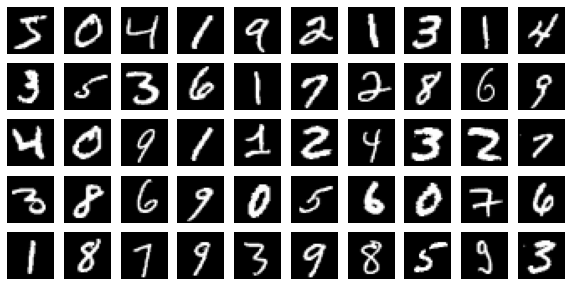

In [3]:
# visualizing samples
utils.show_samples(train_dataset)

# Training Function Implementation (20 P)

**Task:** Implement the training function based on the predefined `train_one_epoch` function provided in `utils.py`.
The training function receives a random initialized model and various hyperparameters. Your task is to
implement the training loop given the function `train_one_epoch`. We want to optimize the model with a cross entropy loss.
Further, we want to collect the final train and test accuracy and also how the training metrics progress over the training.


Therefore, also return the train loss and accuracy after each epoch of the training for further analysis.

*Hint:* to compute the final training and test accuracy after training, you can use the `accuracy` function from `utils.py`

In [4]:
from utils import * 

def train(model, train_dataset, test_dataset, epochs=10, batch_size=32, lr=0.01, momentum=0.0):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    
    train_acc = 0
    arr_epoch_loss = []
    test_acc = 0
    arr_epoch_train_accuracy = []

    for epoch in range(epochs):
        epoch_loss, _accuracy = train_one_epoch(model, train_loader, torch.nn.CrossEntropyLoss(), optimizer)
        arr_epoch_train_accuracy.append(_accuracy)
        arr_epoch_loss.append(epoch_loss)
        
    train_acc = arr_epoch_train_accuracy[-1]
    test_acc = accuracy(model, test_loader)
    print("Train Accuracy: " + str(train_acc) + "; Test Accuracy: " + str(test_acc))

    return train_acc, test_acc, arr_epoch_loss, arr_epoch_train_accuracy

In [5]:
# sanity check for model training
# with 1 epoch, the test accuracy should be ~80%.
torch.manual_seed(1)
model = utils.Lenet5()
train(model=model, train_dataset=train_dataset, test_dataset=test_dataset, epochs=1);

Train Accuracy: 0.32875001430511475; Test Accuracy: 0.809499979019165


In [6]:
# with 1 epoch, the test accuracy should be ~96%.
torch.manual_seed(1)
model2 = utils.Lenet5()
train(model=model2, train_dataset=train_dataset, test_dataset=test_dataset, epochs=1, momentum=0.9);

Train Accuracy: 0.8490999937057495; Test Accuracy: 0.9674000144004822


# Visualizing the effect of momentum with varying the value of learning rate (15 P)

**Task:** We want to compare the effect of momentum on the optimization process for different learning rates.
Use the previously created training function to implement the function `sweep_lr` which should train a model without momentum (`momentum=0.0`)
and momentum (`momentum=0.9`). For each of the two trained models, plot the loss value after each epoch to study how the loss progresses during training.

What can you observe from these plots? What influence does momentum have on the training and why?

In [13]:
def sweep_lr(arr_lr, train_dataset, test_dataset, epochs=5):
    torch.manual_seed(1)
    momentums = [0.0, 0.9]
    
    loss = []
    
    for lr in arr_lr:
        for momentum in momentums:
            model = utils.Lenet5()
            train_acc, test_acc, arr_epoch_loss, arr_epoch_train_accuracy = train(model=model, train_dataset=train_dataset, test_dataset=test_dataset, epochs=epochs, lr=lr, momentum=momentum);
            loss.append(arr_epoch_loss)
    return loss

In [14]:
loss = sweep_lr([1e-3, 1e-2], train_dataset, test_dataset)

Train Accuracy: 0.20774999260902405; Test Accuracy: 0.21060000360012054
Train Accuracy: 0.9551833271980286; Test Accuracy: 0.9606999754905701
Train Accuracy: 0.9485166668891907; Test Accuracy: 0.9573000073432922
Train Accuracy: 0.9822999835014343; Test Accuracy: 0.9839000105857849


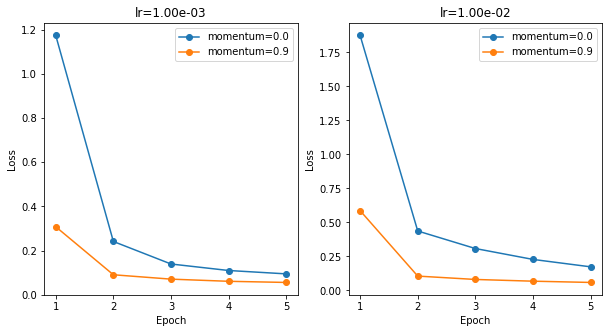

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

x = np.array([i for i in range(1, 6)]) 
y1 = np.array(loss[0])
axs[0].plot(x, y1, label='momentum=0.0', marker="o") 
y2 = np.array(loss[1])
axs[0].plot(x, y2, label='momentum=0.9', marker="o") 

axs[0].set_xlabel('Epoch') 
axs[0].set_ylabel('Loss') 
axs[0].set_title('lr=1.00e-03') 
axs[0].legend()
# plt.show()


y3 = np.array(loss[2])
axs[1].plot(x, y3, label='momentum=0.0', marker="o") 
y4 = np.array(loss[3])
axs[1].plot(x, y4, label='momentum=0.9', marker="o") 

axs[1].set_xlabel('Epoch') 
axs[1].set_ylabel('Loss') 
axs[1].set_title('lr=1.00e-02') 
axs[1].legend()

plt.show()

# Visualizing the effect of momentum when varying the value of batch size (15 P)
**Task:** We want to compare the effect of momentum on the optimization process for different batch sizes.
Similar to the `sweep_lr` function, implement the function `sweep_batchsize` which should train a model without momentum (`momentum=0.0`)
and momentum (`momentum=0.9`) with the specified batch size. For each of the two trained models, plot the loss value after each epoch to study how the loss progresses during training.

What can you observe from these plots?

In [16]:
def sweep_batchsize(arr_batchsize, train_dataset, test_dataset, epochs=5):
    torch.manual_seed(1)

    momentums = [0.0, 0.9]
    
    loss = []
    
    for batch_size in arr_batchsize:
        for momentum in momentums:
            model = utils.Lenet5()
            train_acc, test_acc, arr_epoch_loss, arr_epoch_train_accuracy = train(model=model, train_dataset=train_dataset, test_dataset=test_dataset, epochs=epochs,momentum=momentum, batch_size=batch_size);
            loss.append(arr_epoch_loss)
    return loss
      

In [17]:
loss = sweep_batchsize([16, 32, 64], train_dataset, test_dataset)

Train Accuracy: 0.9714166522026062; Test Accuracy: 0.9717000126838684
Train Accuracy: 0.9828500151634216; Test Accuracy: 0.9824000000953674
Train Accuracy: 0.9485166668891907; Test Accuracy: 0.9573000073432922
Train Accuracy: 0.9822999835014343; Test Accuracy: 0.9839000105857849
Train Accuracy: 0.8962500095367432; Test Accuracy: 0.9150999784469604
Train Accuracy: 0.9804499745368958; Test Accuracy: 0.9829999804496765


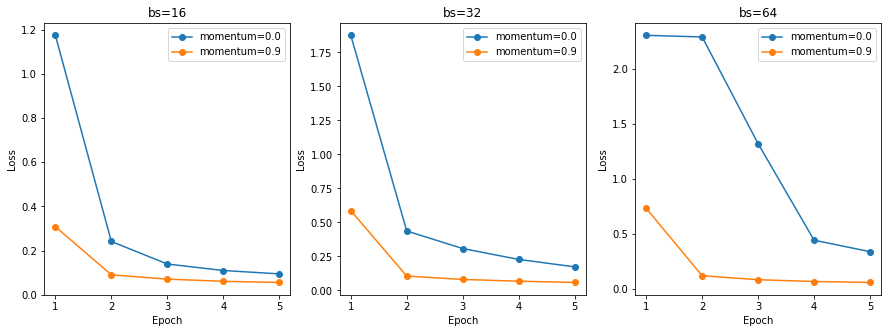

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))


x = np.array([i for i in range(1, 6)]) 
y1 = np.array(loss[0])
axs[0].plot(x, y1, label='momentum=0.0', marker="o") 
y2 = np.array(loss[1])
axs[0].plot(x, y2, label='momentum=0.9', marker="o") 

axs[0].set_xlabel('Epoch') 
axs[0].set_ylabel('Loss') 
axs[0].set_title('bs=16') 
axs[0].legend()
# plt.show()


y3 = np.array(loss[2])
axs[1].plot(x, y3, label='momentum=0.0', marker="o") 
y4 = np.array(loss[3])
axs[1].plot(x, y4, label='momentum=0.9', marker="o") 

axs[1].set_xlabel('Epoch') 
axs[1].set_ylabel('Loss') 
axs[1].set_title('bs=32') 
axs[1].legend()

y5 = np.array(loss[4])
axs[2].plot(x, y5, label='momentum=0.0', marker="o") 
y6 = np.array(loss[5])
axs[2].plot(x, y6, label='momentum=0.9', marker="o") 

axs[2].set_xlabel('Epoch') 
axs[2].set_ylabel('Loss') 
axs[2].set_title('bs=64') 
axs[2].legend()

plt.show()